In [1]:
import MDAnalysis as mda
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("/home/shrishti/Documents/Projects/IDP_ensemble/ProDynaVAE/ProDynaVAE"))
from utils.traj_analysis import *
from utils.plot import *

In [2]:
psf = "../data/ProG_20K/step1_pdbreader.psf"
xtc = "../../protein-VAE-main_org/charmm-gui_3GB1/gromacs/pro_align.xtc"

In [3]:
u = mda.Universe(psf, xtc)

# Bonds

In [4]:
get_bonds?

In [7]:
# use atom types
ca_cb_bond_type_list = get_bonds(psf, xtc, 'CT1', 'CT1', every=200, use_atom_type=True)
ca_cb_bond_type_list

array([[1.50705043, 1.5483534 , 1.53964067, ..., 1.49936602, 1.54470286,
        1.54944927],
       [1.49432176, 1.5683748 , 1.52767626, ..., 1.54770705, 1.56706759,
        1.50794681],
       [1.4705772 , 1.56006458, 1.52131575, ..., 1.51334048, 1.56467395,
        1.5477374 ],
       ...,
       [1.51739941, 1.55669646, 1.48138732, ..., 1.53684931, 1.57092389,
        1.49348644],
       [1.53675101, 1.49526179, 1.51367088, ..., 1.51386991, 1.51940986,
        1.46645753],
       [1.54832375, 1.50456202, 1.52055849, ..., 1.47989825, 1.5730859 ,
        1.61619762]])

In [8]:
# use atom name
ca_cb_bond_list = get_bonds(psf, xtc, 'CA', 'CB', every=200, use_atom_type=False)
ca_cb_bond_list

array([[1.55454184, 1.50705043, 1.56134543, ..., 1.54470286, 1.54944927,
        1.51983588],
       [1.5701621 , 1.49432176, 1.50046823, ..., 1.56706759, 1.50794681,
        1.53212394],
       [1.5132075 , 1.4705772 , 1.55299745, ..., 1.56467395, 1.5477374 ,
        1.54990211],
       ...,
       [1.57571965, 1.51739941, 1.53876454, ..., 1.57092389, 1.49348644,
        1.56246505],
       [1.49485951, 1.53675101, 1.5104279 , ..., 1.51940986, 1.46645753,
        1.58600216],
       [1.61338324, 1.54832375, 1.56399921, ..., 1.5730859 , 1.61619762,
        1.54317937]])

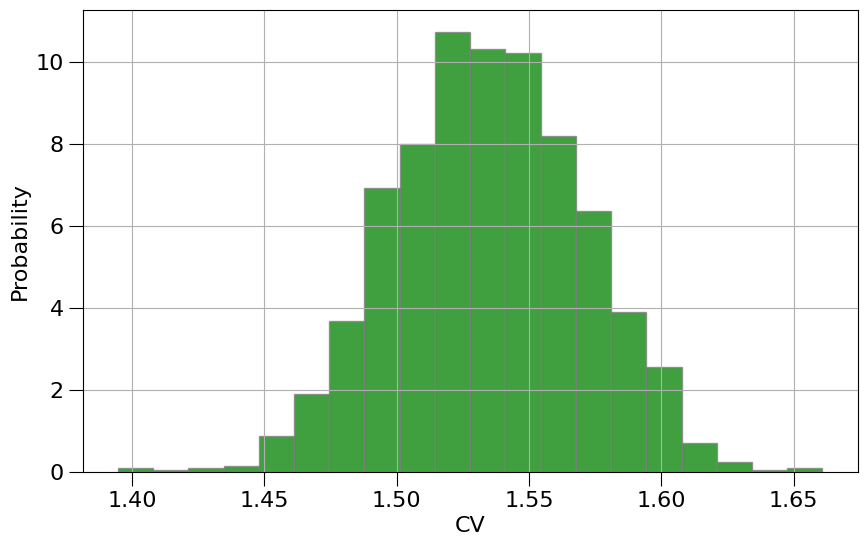

In [9]:
plot_distribution(ca_cb_bond_type_list, bins=20)

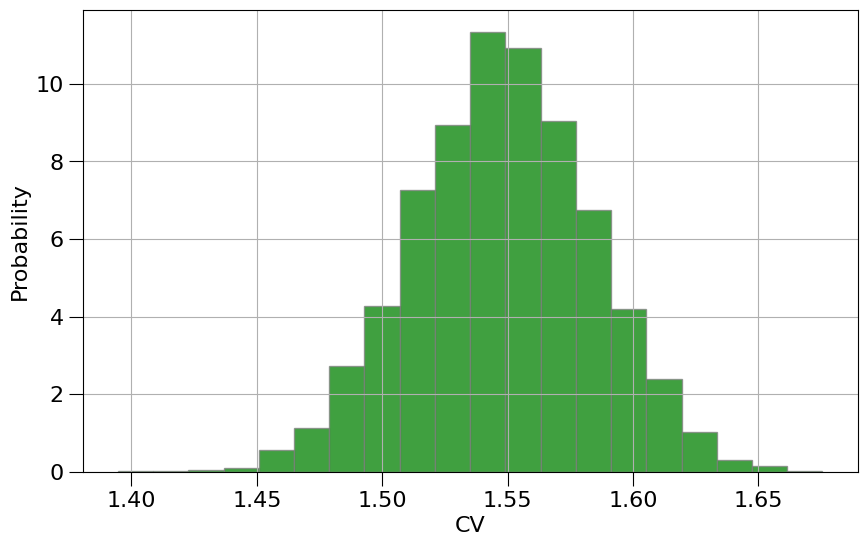

In [10]:
plot_distribution(ca_cb_bond_list, bins=20)

# Angles

In [11]:
get_angles?

In [12]:
angles = get_angles(psf, xtc, 'N', 'CA', 'CB', every=200, use_atom_type=False)

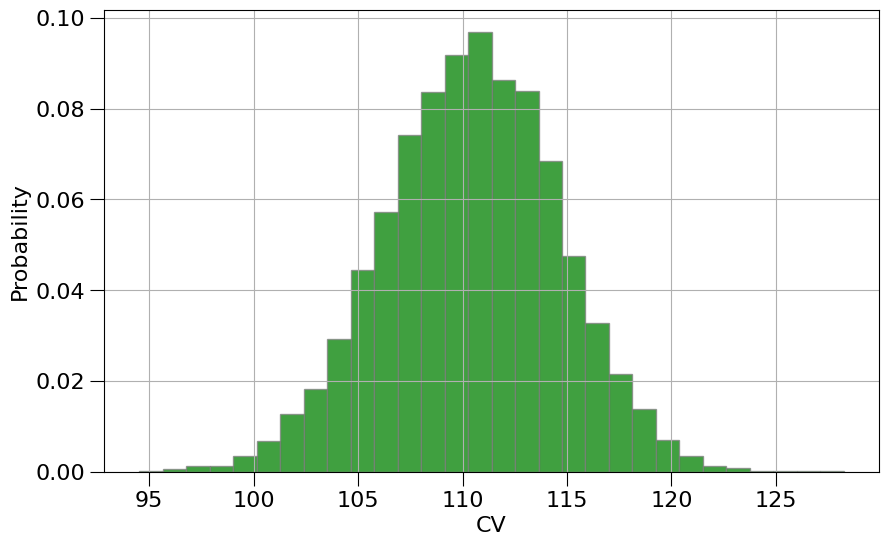

In [13]:
plot_distribution(angles, bins=30)

# Improper Dihedrals

In [14]:
get_bb_impropers?

# each peptide bond has two backbone dihedrals
# 1. C CT1 NH1 O
# 2. NH1 C CT1 H

In [15]:
bbimpropers = get_bb_impropers(psf, xtc, every=200)

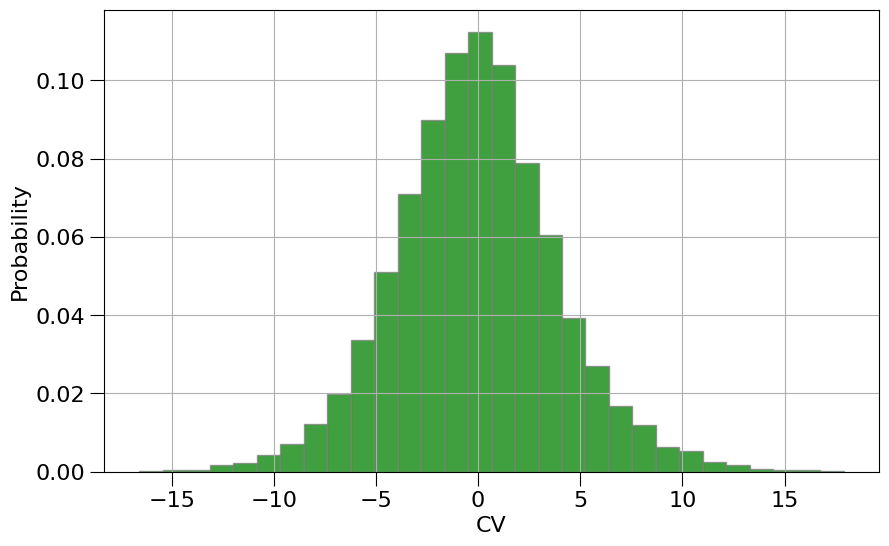

In [16]:
plot_distribution(bbimpropers, bins=30)

# Dihedrals

In [17]:
get_omegas?

In [18]:
omegas = get_omegas(psf, xtc, every=200)

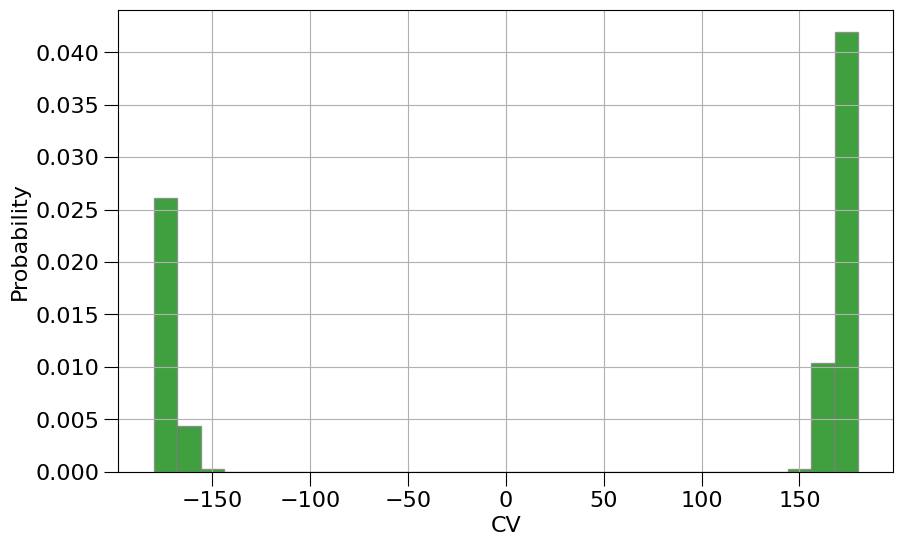

In [19]:
plot_distribution(omegas, bins=30)

In [20]:
# a more general dihedral
get_dihedrals?

In [21]:
dihe_example = get_dihedrals(psf, xtc, 'N', 'CA', 'C', 'N', every=200, use_atom_type=False)

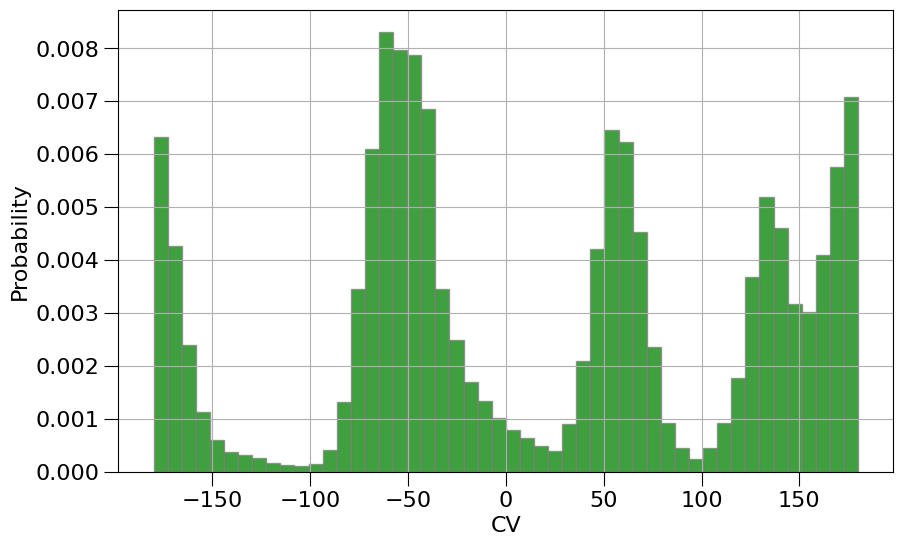

In [22]:
plot_distribution(dihe_example, bins=50)

# Testing: Gaussian distributions

bonds:

$energy = 0.5 * k_b * (x - b0)^2$

for CT1-CT1 bonds:

$k_b = 1.861880e+05$

$b_0 = 1.500000e-01$

the ideal Gaussian distribution:

$e^{-\beta * 0.5 * k_b *(b - b_0)^2}$

In [23]:
# unit: ang
b0 = 1.5

In [24]:
# unit: kj / (mol * ang^2)
kb = 1.86188e3

In [25]:
# unit: kj
beta = 1/ (1.380649e-23 * 298)

In [26]:
beta

2.4305270188053424e+20

In [35]:
y = np.exp(-beta*0.5*kb*(ca_cb_bond_list - b0))
x = ca_cb_bond_list

/home/shrishti/anaconda3/envs/pro_vae/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [39]:
y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., inf,  0., ...,  0.,  0.,  0.],
       [ 0., inf,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., inf,  0.],
       [inf,  0.,  0., ...,  0., inf,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

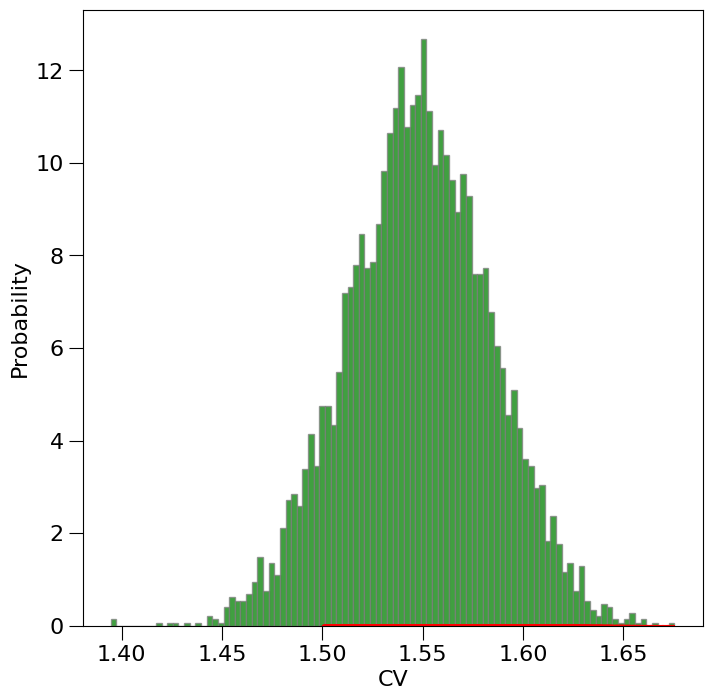

In [120]:
data = ca_cb_bond_list.flatten()
bin_number=100

fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(data, bin_number, density=True, alpha=0.75, color='green', edgecolor='gray')
ax.plot(x, y/(x[1] - x[0]), 'r--')
# ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
# ax.set_ylim([0, 1])
ax.set_xlabel("CV", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)
ax.tick_params(axis='both', which='major', length=10, labelsize=16)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

In [44]:
import parmed as pmd

In [73]:
gmx_top = pmd.load_file("../../protein-VAE-main_org/charmm-gui_3GB1/gromacs/topol.top")
print(gmx_top)

<GromacsTopologyFile 17263 atoms; 5548 residues; 17235 bonds; parametrized>


In [85]:
gmx_top.atoms

AtomList([
	<Atom N [0]; In MET 0>
	<Atom HT1 [1]; In MET 0>
	<Atom HT2 [2]; In MET 0>
	<Atom HT3 [3]; In MET 0>
	<Atom CA [4]; In MET 0>
	<Atom HA [5]; In MET 0>
	<Atom CB [6]; In MET 0>
	<Atom HB1 [7]; In MET 0>
	<Atom HB2 [8]; In MET 0>
	<Atom CG [9]; In MET 0>
	<Atom HG1 [10]; In MET 0>
	<Atom HG2 [11]; In MET 0>
	<Atom SD [12]; In MET 0>
	<Atom CE [13]; In MET 0>
	<Atom HE1 [14]; In MET 0>
	<Atom HE2 [15]; In MET 0>
	<Atom HE3 [16]; In MET 0>
	<Atom C [17]; In MET 0>
	<Atom O [18]; In MET 0>
	<Atom N [19]; In THR 1>
	<Atom HN [20]; In THR 1>
	<Atom CA [21]; In THR 1>
	<Atom HA [22]; In THR 1>
	<Atom CB [23]; In THR 1>
	...
	<Atom H1 [17258]; In TIP3 5546>
	<Atom H2 [17259]; In TIP3 5546>
	<Atom OH2 [17260]; In TIP3 5547>
	<Atom H1 [17261]; In TIP3 5547>
	<Atom H2 [17262]; In TIP3 5547>
])

In [119]:
bond_N_O = None
for bond in gmx_top.bonds:
#     print(bond.atom1.name)
    if bond.atom1.type =='C' and bond.atom2.type == 'O':
        bond_N_O = bond
        print(bond_N_O)
        
if bond_N_O is not None:
    # Access and print the equilibrium bond length using parm_data
    equilibrium_length = bond_N_O.type.req
    print(f"Equilibrium bond length for N-O: {equilibrium_length} Angstroms")
b = equilibrium_length = bond_N_O.type.req
b


<Bond <Atom C [145]; In ASN 7>--<Atom O [146]; In ASN 7>; type=<BondType; k=620.000, req=1.230>>
<Bond <Atom C [547]; In ASN 34>--<Atom O [548]; In ASN 34>; type=<BondType; k=620.000, req=1.230>>
<Bond <Atom C [573]; In ASN 36>--<Atom O [574]; In ASN 36>; type=<BondType; k=620.000, req=1.230>>
Equilibrium bond length for N-O: 1.23 Angstroms


1.23

In [114]:
angle_N_CA_CB = next((angle for angle in gmx_top.angles if
                     angle.atom1.name == 'N' and angle.atom2.name == 'CA' and angle.atom3.name == 'CB'), None)

# Check if the angle was found
if angle_N_CA_CB is not None:
    # Access and print the equilibrium angle value
    equilibrium_angle = angle_N_CA_CB.type.theteq
    print(f"Equilibrium angle between N, CA, and CB: {equilibrium_angle} degrees")


Equilibrium angle between N, CA, and CB: 110.0 degrees


In [118]:
dihedral_N_CA_C_N = next((dihedral for dihedral in gmx_top.dihedrals if
                         dihedral.atom1.name == 'N' and dihedral.atom2.name == 'CA'
                         and dihedral.atom3.name == 'C' and dihedral.atom4.name == 'N'), None)

# Check if the dihedral angle was found
if dihedral_N_CA_C_N is not None:
    # Access and print the parameters for each term in the dihedral
    for term in dihedral_N_CA_C_N.type:
        equilibrium_dihedral = term.phi_k
        print(f"Equilibrium dihedral angle between N, CA, C, and N: {equilibrium_dihedral} degrees")


Equilibrium dihedral angle between N, CA, C, and N: 0.6 degrees
